In [1]:
from EMNIST import x_train, y_train, x_test, y_test
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn import metrics
from random import randint, shuffle
import numpy as np
import pandas as pd
import time
import database_creada

In [2]:
x_train_mlpr = list(x_train)
y_train_mlpr = y_train
x_test_mlpr = list(x_test)
y_test_mlpr = y_test

In [3]:
clf_mlpr = MLPClassifier(verbose=True)

In [4]:
clf_mlpr.fit(x_train_mlpr, y_train_mlpr)

Iteration 1, loss = 2.36279264
Iteration 2, loss = 1.33172607
Iteration 3, loss = 1.19370542
Iteration 4, loss = 1.11164681
Iteration 5, loss = 1.08604131
Iteration 6, loss = 1.07259503
Iteration 7, loss = 1.06684650
Iteration 8, loss = 1.06017034
Iteration 9, loss = 1.05749220
Iteration 10, loss = 1.05418513
Iteration 11, loss = 1.05063414
Iteration 12, loss = 1.04936585
Iteration 13, loss = 1.04730504
Iteration 14, loss = 1.04539495
Iteration 15, loss = 1.04363885
Iteration 16, loss = 1.04251614
Iteration 17, loss = 1.03940051
Iteration 18, loss = 1.04065489
Iteration 19, loss = 1.03940289
Iteration 20, loss = 1.03523949
Iteration 21, loss = 1.03079710
Iteration 22, loss = 1.02870808
Iteration 23, loss = 1.02974727
Iteration 24, loss = 1.02748704
Iteration 25, loss = 1.02704134
Iteration 26, loss = 1.02490514
Iteration 27, loss = 1.02295660
Iteration 28, loss = 1.02345413
Iteration 29, loss = 1.02231242
Iteration 30, loss = 1.02154194
Iteration 31, loss = 1.01956593
Iteration 32, los

c:\users\aguer\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(verbose=True)

In [5]:
predicted_mlpr = clf_mlpr.predict(x_test_mlpr)
expected_mlpr = y_test_mlpr

In [6]:
x_test_mlpr = np.array(x_test_mlpr)

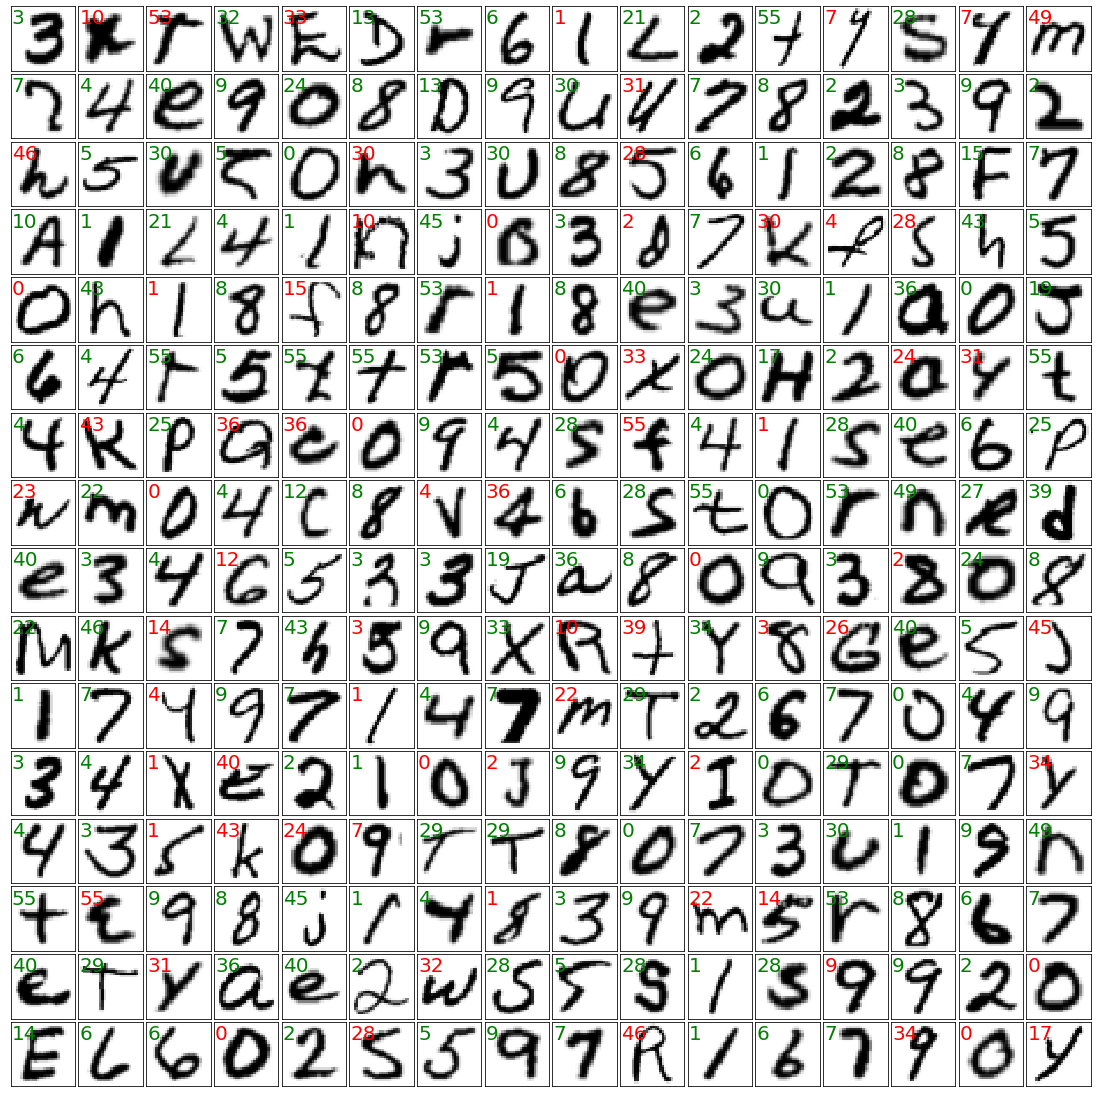

In [7]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for j in range(256):
    i = randint(0, len(predicted_mlpr) - 1)
    ax = fig.add_subplot(16, 16, j + 1, xticks=[], yticks=[])
    ax.imshow(x_test_mlpr.reshape(-1, 28, 28)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    if predicted_mlpr[i] == expected_mlpr[i]:
        ax.text(0, 7, str(predicted_mlpr[i]), fontsize=20, color='green')
    else:
        ax.text(0, 7, str(predicted_mlpr[i]), fontsize=20, color='red')
ax.axis("on")
fig.savefig('out.png', dpi=fig.dpi, edgecolor="purple")

In [8]:
print(metrics.classification_report(expected_mlpr, predicted_mlpr))

c:\users\aguer\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.63      0.75      0.68      5778
           1       0.61      0.94      0.74      6330
           2       0.81      0.91      0.86      5869
           3       0.85      0.93      0.89      5969
           4       0.83      0.85      0.84      5619
           5       0.86      0.69      0.76      5190
           6       0.83      0.94      0.88      5705
           7       0.93      0.94      0.94      6139
           8       0.85      0.86      0.85      5633
           9       0.86      0.89      0.88      5686
          10       0.51      0.75      0.61      1062
          11       0.76      0.06      0.12       648
          12       0.57      0.80      0.66      1739
          13       0.58      0.47      0.52       779
          14       0.69      0.73      0.71       851
          15       0.66      0.71      0.68      1440
          16       0.61      0.11      0.19       447
          17       0.47    

In [9]:
df = pd.DataFrame(metrics.confusion_matrix(expected_mlpr, predicted_mlpr))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,4323,10,3,1,7,2,11,1,27,2,5,0,10,104,0,2,0,0,2,0,0,0,0,4,1135,0,14,0,4,0,50,0,4,0,0,0,21,3,0,11,2,0,0,0,0,1,0,1,0,17,0,0,0,0,0,0,0,1,0,0,0,0
1,1,5960,20,7,7,0,1,6,11,0,0,0,0,2,0,0,0,0,184,0,0,1,1,0,0,5,0,0,2,1,1,3,0,2,2,0,1,1,0,3,0,0,0,4,1,3,0,66,0,8,0,0,0,15,0,9,0,0,0,2,0,0
2,5,5,5358,20,7,0,4,12,7,2,20,0,26,17,2,0,0,3,33,0,0,13,0,1,0,1,10,7,13,1,3,1,0,24,0,18,103,0,0,66,1,2,1,3,0,15,1,16,0,5,0,0,0,1,0,10,0,0,4,7,0,21
3,9,7,87,5560,1,35,0,35,26,25,4,1,0,3,0,0,0,0,14,1,0,0,0,0,0,0,2,1,111,0,0,0,0,0,0,1,10,1,0,11,1,0,3,0,0,11,0,0,0,1,0,0,0,1,0,6,0,0,0,1,0,0
4,1,2,5,16,4802,1,12,8,4,156,95,0,5,0,1,24,0,68,0,0,1,1,4,18,1,7,7,4,0,0,72,14,9,0,45,0,33,0,0,12,11,1,0,10,0,0,1,0,0,8,0,0,0,4,0,132,1,1,12,4,6,0
5,4,3,8,143,3,3556,73,0,25,25,0,0,6,4,58,22,9,0,20,9,1,0,0,0,0,0,0,0,1115,18,1,2,1,0,0,0,2,5,0,1,0,3,0,1,0,3,0,2,0,0,0,0,0,30,3,30,0,0,0,4,0,0
6,8,10,1,0,10,6,5360,0,4,1,0,0,57,0,3,6,0,1,2,0,2,33,0,0,1,0,1,0,2,0,41,1,23,0,0,0,7,55,0,13,0,1,0,37,0,1,3,6,0,1,0,0,0,0,0,3,0,0,5,0,0,0
7,0,12,58,33,20,5,0,5790,8,54,1,0,1,3,0,10,0,0,15,0,1,0,1,0,0,10,3,0,0,30,0,0,0,3,11,0,6,0,0,0,0,0,0,0,0,0,0,1,0,36,0,0,0,3,0,24,0,0,0,0,0,0
8,19,70,40,78,13,32,26,10,4848,23,19,6,1,8,22,12,3,4,37,0,3,1,0,1,2,35,18,29,42,6,4,28,4,24,9,1,8,1,0,14,3,3,3,3,0,0,4,9,0,5,0,1,4,36,0,42,0,1,1,16,1,0
9,4,0,2,81,113,15,1,125,36,5086,46,0,0,0,0,35,0,0,1,0,0,0,1,0,0,39,11,0,1,0,1,0,0,0,34,0,11,0,0,0,3,0,16,0,0,0,0,1,0,6,0,0,1,0,0,16,0,0,0,0,0,0


In [10]:
train_counts = list()
y_train_mlpr = list(y_train)
for i in range (62):
    train_counts.append(y_train_mlpr.count(i))
for i in range (len(y_train_mlpr)):
    y_train_mlpr[i] = [y_train_mlpr[i], i]
y_train_mlpr.sort()
x_train_balanced = list()
y_train_balanced = list()
n = 1895
intervalos = list()
for i in range (62):
    inf = sum(train_counts[:i]) + 1
    inf_mas_1 = sum(train_counts[:i+1])
    sup = min(inf + n, inf_mas_1)
    intervalos.append([inf, sup])
for i in range (62):
    y_train_balanced.extend(y_train_mlpr[intervalos[i][0]:intervalos[i][1]])
shuffle(y_train_balanced)
for i in range (len(y_train_balanced)):
    x_train_balanced.append(x_train_mlpr[y_train_balanced[i][1]])
    y_train_balanced[i] = y_train_balanced[i][0]
clases62 = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

In [11]:
inicio = time.time()
clf_mlpr2 = MLPClassifier()
clf_mlpr2.fit(x_train_balanced, y_train_balanced)
fin = time.time()
print(fin - inicio)

552.9820659160614


In [12]:
y_test_mlpr = list(y_test)
test_counts = list()
for i in range (61):
    test_counts.append(y_test_mlpr.count(i))
for i in range (len(y_test)):
    y_test_mlpr[i] = [y_test[i], i]
y_test_mlpr.sort()
x_test_balanced = list()
y_test_balanced = list()
n = 317
intervalos = list()
for i in range (62):
    inf = sum(test_counts[:i]) + 1
    sup = inf + n
    intervalos.append([inf, sup])
for i in range (62):
    y_test_balanced.extend(y_test_mlpr[intervalos[i][0]:intervalos[i][1]])
shuffle(y_test_balanced)
for i in range (len(y_test_balanced)):
    x_test_balanced.append(x_test[y_test_balanced[i][1]])
    y_test_balanced[i] = y_test_balanced[i][0]

In [13]:
predicted_mlpr = clf_mlpr.predict(x_test_balanced)
expected_mlpr = y_test_balanced
predicted_mlpr2 = clf_mlpr2.predict(x_test_balanced)
expected_mlpr2 = y_test_balanced

In [14]:
print(metrics.classification_report(expected_mlpr2, predicted_mlpr2))

              precision    recall  f1-score   support

           0       0.34      0.04      0.08       317
           1       0.41      0.75      0.53       317
           2       0.70      0.56      0.62       317
           3       0.58      0.80      0.67       317
           4       0.56      0.65      0.60       317
           5       0.56      0.59      0.58       317
           6       0.72      0.74      0.73       317
           7       0.85      0.72      0.78       317
           8       0.81      0.31      0.45       317
           9       0.50      0.82      0.62       317
          10       0.51      0.81      0.63       317
          11       0.61      0.70      0.65       317
          12       0.62      0.27      0.38       317
          13       0.55      0.74      0.63       317
          14       0.81      0.59      0.68       317
          15       0.50      0.50      0.50       317
          16       0.76      0.63      0.69       317
          17       0.74    

In [15]:
df = pd.DataFrame(metrics.confusion_matrix(expected_mlpr2, predicted_mlpr2))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,14,0,0,0,0,0,0,0,0,0,1,1,1,37,0,0,0,0,0,0,0,0,0,0,240,0,8,0,1,0,1,0,0,0,0,0,2,1,1,2,0,0,1,0,0,1,0,0,2,1,2,0,0,0,0,0,0,0,0,0,0,0
1,0,239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,4,23,4,0,3,0,0,0,0,2,1,0,3,0,1,0,0,0,0
2,1,0,178,6,0,0,0,2,3,0,3,1,0,11,1,1,0,0,5,1,0,1,0,0,0,0,1,0,1,0,2,1,0,2,0,35,1,0,1,2,0,0,0,1,2,4,0,0,0,0,0,0,1,0,0,3,0,0,0,1,0,45
3,0,0,7,255,0,2,0,2,1,0,1,8,0,7,0,1,0,0,4,2,0,0,0,0,1,0,0,0,6,0,0,0,0,0,0,2,1,1,0,1,0,0,3,0,0,4,0,0,0,2,0,0,0,0,0,4,0,0,0,1,0,1
4,0,0,1,0,206,0,0,0,0,7,17,0,0,0,0,4,1,2,0,0,1,0,0,5,0,1,7,0,0,0,0,1,0,0,25,0,0,0,0,0,0,1,0,2,0,0,0,0,2,0,0,0,4,1,0,2,8,12,1,1,5,0
5,0,1,0,6,0,188,1,0,0,0,0,2,0,2,3,4,7,0,2,2,0,0,0,0,0,0,0,0,54,4,0,0,0,0,2,0,0,1,1,0,0,3,2,1,0,6,0,0,0,0,0,0,0,11,10,3,0,0,0,1,0,0
6,0,0,0,0,0,1,233,0,0,0,1,0,5,1,2,0,11,0,1,0,0,3,0,0,0,0,0,0,5,0,5,0,0,0,0,0,1,30,12,0,0,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,1,7,5,0,0,227,0,20,2,0,0,0,0,2,0,0,4,1,0,0,0,0,0,10,0,0,0,18,0,0,0,0,5,0,0,0,0,0,0,2,6,0,0,1,0,0,0,0,0,0,2,0,0,4,0,0,0,0,0,0
8,0,4,3,7,1,9,0,0,99,6,3,56,0,1,3,2,1,0,0,0,2,0,0,0,1,20,2,4,4,0,0,1,0,4,6,1,0,0,1,0,1,2,28,0,1,0,0,0,0,0,0,1,35,5,1,1,0,0,0,0,0,1
9,0,0,0,2,3,1,0,4,0,259,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,3,0,0,0,0,0,0,1,0,0,28,0,0,0,0,0,0,0,0,0


In [16]:
df = pd.DataFrame(metrics.confusion_matrix(expected_mlpr, predicted_mlpr))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,235,0,0,0,0,0,1,0,2,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,64,0,0,0,1,0,1,0,0,0,0,0,1,0,0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,301,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0,0
2,0,0,291,1,2,0,0,0,0,0,0,0,1,1,1,0,0,0,4,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,2,6,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,2,1,10,289,0,2,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,1,0,1,277,0,0,0,0,7,3,0,0,0,0,4,0,4,0,0,1,0,0,2,0,0,1,0,0,0,2,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,6,0,0,2,0,0,0
5,1,0,0,13,0,210,4,0,3,0,0,0,1,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,73,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,2,0,0,0,0,0,0
6,2,0,0,0,0,0,304,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,5,3,2,1,0,292,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
8,0,2,3,3,1,3,1,0,273,2,4,1,0,0,1,1,0,0,0,0,1,0,0,0,1,3,0,3,1,0,0,2,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,2,0,0,1,3,0,2,0,0,0,0,0,0
9,0,0,0,3,5,1,0,9,1,291,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [17]:
print(metrics.classification_report(expected_mlpr, predicted_mlpr))

              precision    recall  f1-score   support

           0       0.30      0.74      0.43       317
           1       0.31      0.95      0.47       317
           2       0.35      0.92      0.51       317
           3       0.52      0.91      0.66       317
           4       0.41      0.87      0.56       317
           5       0.63      0.66      0.65       317
           6       0.41      0.96      0.58       317
           7       0.75      0.92      0.83       317
           8       0.47      0.86      0.61       317
           9       0.49      0.92      0.64       317
          10       0.52      0.80      0.63       317
          11       0.86      0.08      0.14       317
          12       0.41      0.82      0.54       317
          13       0.81      0.45      0.58       317
          14       0.83      0.71      0.77       317
          15       0.46      0.71      0.56       317
          16       0.80      0.09      0.16       317
          17       0.68    

c:\users\aguer\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Clasificación de Base de Datos creada por nosotros

In [18]:
expected_grupo = database_creada.y_test_all

In [19]:
predicted_ferra = clf_mlpr2.predict(database_creada.base_de_datos_ferra)
predicted_vicente = clf_mlpr2.predict(database_creada.base_de_datos_vicente)
predicted_javier = clf_mlpr2.predict(database_creada.base_de_datos_javier)
predicted_antonia = clf_mlpr2.predict(database_creada.base_de_datos_antonia)
predicted_felipe = clf_mlpr2.predict(database_creada.base_de_datos_felipe)
predicted_word = clf_mlpr2.predict(database_creada.base_de_datos_word)

In [20]:
print(metrics.classification_report(expected_grupo, predicted_ferra))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.33      1.00      0.50         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

c:\users\aguer\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
print(metrics.classification_report(expected_grupo, predicted_vicente))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       0.50      1.00      0.67         1
          10       0.00      0.00      0.00         1
          11       0.33      1.00      0.50         1
          12       0.00      0.00      0.00         1
          13       0.50      1.00      0.67         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       0.50    

In [22]:
print(metrics.classification_report(expected_grupo, predicted_javier))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.50      1.00      0.67         1
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

In [23]:
print(metrics.classification_report(expected_grupo, predicted_antonia))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       0.00    

In [24]:
print(metrics.classification_report(expected_grupo, predicted_felipe))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.50      1.00      0.67         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

In [25]:
print(metrics.classification_report(expected_grupo, predicted_word))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

In [26]:
data_propia = [round(metrics.accuracy_score(expected_grupo, predicted_felipe), 2), \
        round(metrics.accuracy_score(expected_grupo, predicted_ferra), 2), \
        round(metrics.accuracy_score(expected_grupo, predicted_antonia), 2), \
        round(metrics.accuracy_score(expected_grupo, predicted_javier), 2), \
               round(metrics.accuracy_score(expected_grupo, predicted_vicente), 2), \
        round(metrics.accuracy_score(expected_grupo, predicted_word), 2)]
index = ["F. Valdés", "S. Ferrá", "A. Reyes", "J. Takahashi", "V. Agüero", "Arial Black"]
df_database_propia = pd.DataFrame(data_propia, index = index, columns=["Accuracy"])
df_database_propia

,Accuracy
F. Valdés,0.08
S. Ferrá,0.08
A. Reyes,0.13
J. Takahashi,0.34
V. Agüero,0.52
Arial Black,0.06
